In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image 
import matplotlib.pyplot as plt


In [2]:
SIZE= 256


In [3]:

# Load the saved model
loaded_model = tf.saved_model.load('../tf_model/1/')
# Get a reference to the inference function (assuming it's named 'call')
inference_function = loaded_model.signatures['serving_default']

In [4]:
loaded_model.signatures.keys()

KeysView(_SignatureMap({'serving_default': <ConcreteFunction signature_wrapper(*, sequential_input) at 0x19D87BB4250>}))

In [6]:
# Perform inference on input data

img='./test_img//1.JPG'

my_image = image.load_img(img)
my_image = image.img_to_array(my_image)


my_image = np.expand_dims(my_image, 0)


my_image.shape

(1, 256, 256, 3)

In [ ]:
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

input_tensor = tf.convert_to_tensor(my_image, dtype=tf.float32)
output = inference_function(input_tensor)
predicted = class_names[np.argmax(output['dense_5'].numpy())] 


In [ ]:
predicted

'Potato___Early_blight'

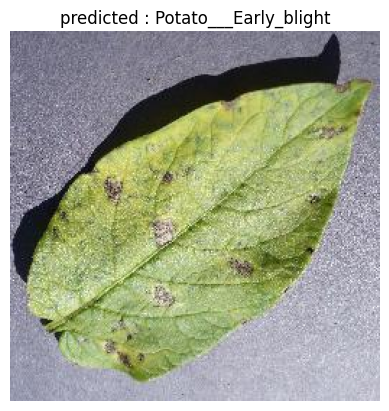

In [ ]:
my_image = image.load_img(img)
# my_image = image.img_to_array(my_image)

plt.imshow(my_image)
plt.axis('off')
plt.title('predicted : ' + predicted)
plt.show()

In [ ]:
def prediction(img):
    class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

    org_image = image.load_img(img)
    my_image = image.img_to_array(org_image)
    my_image = np.expand_dims(my_image, 0)
    
    #preicteding
    input_tensor = tf.convert_to_tensor(my_image, dtype=tf.float32)
    output = (inference_function(input_tensor))['dense_5'].numpy()[0]
    predicted = class_names[np.argmax(output)] 
    
    fig = plt.figure(figsize=(7, 10))

    text   = ''
    for index, value in enumerate(output):
        text += f"{class_names[index]} - {100*value:.2f} %\n"
        # plt.text(value/2 + 0.1, index, f"{100*value:.2f}%", fontweight='bold')

    plt.imshow(org_image)
    plt.axis('off')
    plt.title(text + '    predicted : ' + predicted)
    return plt.show()
    


In [ ]:
img1 = './1.JPG'
img2 = './2.JPG'
img3 = './3.JPG'
img4 = './4.JPG'


Potato___Early_blight  - 66.57%
Potato___Late_blight  - 0.49%
Potato___healthy  - 32.94%


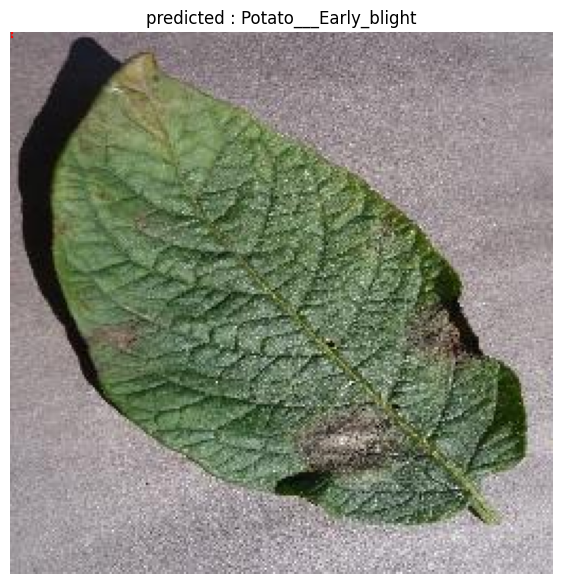

In [ ]:
prediction(img4)
